In [1]:
import numpy as np 
import pandas as pd

In [2]:
# This function return Minimum value greater than 0 in a dataframe
def min_val_positif_index_df(df): 
    # Finding the minimum value greater than 0
    min_val = df[df > 0].min().min()
    # Getting the indices of the minimum value
    indices = df[df == min_val].stack().index.tolist()

    return min_val, list(indices[-1])

In [15]:
# This function return Minimum value greater than 0 in a dataframe
def min_val_index_df(df): 
    # Finding the minimum value greater than 0
    min_val = df[df != 0].min().min()
    # Getting the indices of the minimum value
    indices = df[df == min_val].stack().index.tolist()

    return min_val, list(indices[-1])

In [4]:
def mismatche_matrix_to_df(mismatch_m,seq_names):
    return pd.DataFrame(data=mismatch_m, columns=seq_names ,index=seq_names)

In [5]:
#Neighbor Joining
example_1 = [[0,2,4,6,6,8],
      [2,0,4,6,6,8],
      [4,4,0,6,6,8],
      [6,6,6,0,4,8],
      [6,6,6,4,0,8],
      [8,8,8,8,8,0]]

In [6]:
example_2 = [[0,17,21,27],
             [17,0,12,18],
             [21,12,0,14],
             [27,18,14,0]]
seq_names = ['A','B','C','D']

In [7]:
df_example_2 = mismatche_matrix_to_df(example_2,seq_names)
df_example_2

,A,B,C,D
A,0,17,21,27
B,17,0,12,18
C,21,12,0,14
D,27,18,14,0


In [8]:
# Compute r'_{i} for each terminal node 
df_example_2_copy = df_example_2.copy()
n = len(df_example_2_copy)
# Compute r for each terminal node 
row_sums = df_example_2_copy.sum(axis=1)/(n-2)
print(row_sums)
#row_sums['A']

A    32.5
B    23.5
C    23.5
D    29.5
dtype: float64


In [14]:
# Update d' distance matrix  
# using the formula d'_ij = d_ij - ri - rj
df_example_2_second = df_example_2.copy()

num_rows, num_cols = df_example_2_second.shape

for i in range(num_rows):
    for j in range(i + 1, num_cols):
        #print(f'Value at ({i}, {j}): {df_example_2_second.iat[i, j]}')
        #print(df_example_2_second.iat[i, j])
        new_value = df_example_2.iloc[i, j] - row_sums[i] - row_sums[j]
        df_example_2_second.iat[i, j] = df_example_2_second.iat[j,i] = new_value
print(df_example_2_second)


    A   B   C   D
A   0 -39 -35 -35
B -39   0 -35 -35
C -35 -35   0 -39
D -35 -35 -39   0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15664\3981819580.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_value = df_example_2.iloc[i, j] - row_sums[i] - row_sums[j]


In [18]:
_, min_indices = min_val_index_df(df_example_2_second)
min_indices

['D', 'C']

In [19]:
# Calculate branch length 
i = min_indices[0]
j = min_indices[1]

new_cluster_name = str(i)+str(j)

In [17]:
df_example_2_second.loc['A','B']

-39

In [20]:
v_i = 0.5 * df_example_2_second.loc[i, j] + 0.5 * (row_sums[i] - row_sums[j])
v_j = 0.5 * df_example_2_second.loc[i, j] + 0.5 * (row_sums[j] - row_sums[i])

In [21]:
print(v_i, v_j)

-16.5 -22.5


In [19]:
# Update the distance matrix
# Delete row i and j 
df_example_2_second.drop(min_indices, axis=1, inplace=True)
df_example_2_second.drop(min_indices, axis=0, inplace=True)

# d_{ij,k} = (d_{i,k}+d_{j,k}-{i,j})/2
d = []
for col in df_example_2_second:
    # d CB col  
    d.append(df_example_2_second.loc[i, col] + df_example_2_second.loc[j, col]- df_example_2_second.loc[i, j]) / 2 #  len(df_example_2_second) - 2

df_example_2_second[new_cluster_name] = d
d.append(0)
df_example_2_second.loc[new_cluster_name] = d

KeyError: 'D'

In [ ]:


# save the format 

65

In [ ]:
# Repeat the steps 

---

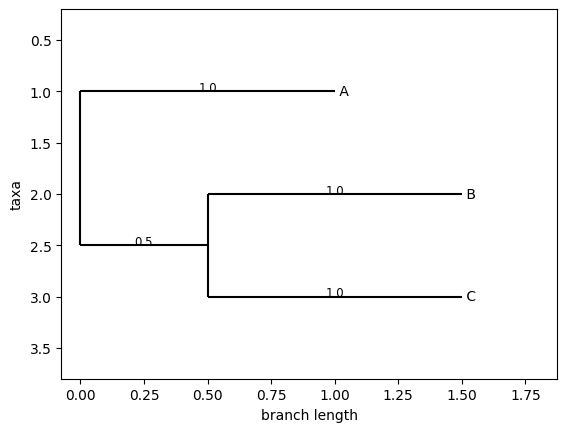

In [ ]:
from Bio import Phylo
import io

# Your Newick tree string for the starting tree
newick_tree = "(A:1, (B:1,C:1):0.5);"

# Parse the Newick tree string
tree = Phylo.read(io.StringIO(newick_tree), "newick")

# Draw the starting tree (without root)
Phylo.draw(tree, branch_labels=lambda c: c.branch_length if c.branch_length else None, do_show=False)
